# "Hot" Plasma Paper II Figures

In [55]:
#Import needed libraries
import sys
import os
from imp import reload
import numpy as np
from astroML import density_estimation
import matplotlib.pyplot as plt
plt.style.use('papers')
import seaborn.apionly as sns
sys.path.append(os.path.join(os.environ['RESEARCH_DIR'],'EBTEL_analysis/src/'))
import ebtel_dem as ebd
import ebtel_plot_em as ebpe
%matplotlib inline
reload(ebd)
reload(ebpe)

/opt/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<module 'ebtel_plot_em' from '/home/wtb2/Documents/EBTEL_analysis/src/ebtel_plot_em.py'>

Build all the figures needed for "Hot" Plasma Paper II

## Figure 2

Sample $T(t)$ and $n(t)$ profiles for a nanoflare train heating function. Probably best to use a uniform example here. Show multiple frequencies? Maybe switch the order since we will show some sample heating functions in the next figure?

## Figure 3

First get three sample heating functions and plot them.

In [114]:
root_dir = '/data/datadrive2/EBTEL_runs/electron_heating_runs/'
tn_ext = 'ebtel_L40.0_tn%d%s_tpulse200.0_rka4'

In [123]:
hf_uni = np.loadtxt(os.path.join(root_dir,'alphauniform','data',tn_ext%(1000,''),tn_ext%(1000,'')+'_0.txt'))
hf_uni = [hf_uni[:,0],hf_uni[:,15]]
lf_uni = np.loadtxt(os.path.join(root_dir,'alphauniform','data',tn_ext%(5000,''),tn_ext%(5000,'')+'_0.txt'))
lf_uni = [lf_uni[:,0],lf_uni[:,15]]
if_pl = np.loadtxt(os.path.join(root_dir,'alpha1.5','data',tn_ext%(2000,'-b1.0'),tn_ext%(2000,'-b1.0')+'_0.txt'))
if_pl = [if_pl[:,0],if_pl[:,15]]

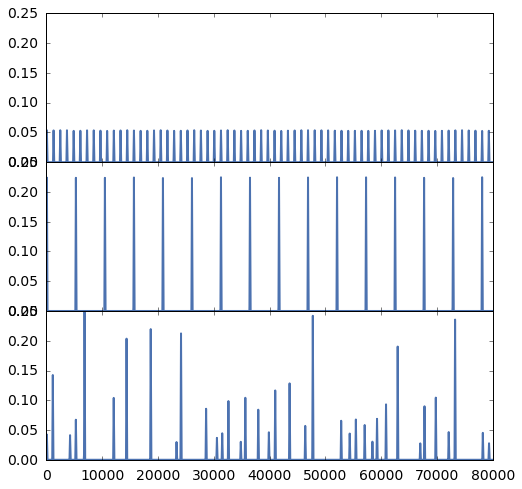

In [129]:
fig,axes = plt.subplots(3,1,figsize=(8,8),sharex=True,sharey=True)
plt.subplots_adjust(hspace=0)
axes[0].plot(hf_uni[0],hf_uni[1],color=sns.color_palette('deep')[0])
axes[1].plot(lf_uni[0],lf_uni[1],color=sns.color_palette('deep')[0])
axes[2].plot(if_pl[0],if_pl[1],color=sns.color_palette('deep')[0])

For the second, get all event energies from $t_N=5000$ s events for $\alpha=-1.5,-2,-2.5$ and plot them all on the same histogram.

In [116]:
sample_tn = 250
dir_format = os.path.join(root_dir,'alpha%.1f','data',tn_ext)
events = {'alpha15':[],'alpha20':[],'alpha25':[]}

In [117]:
#alpha 1.5 events
for fn in os.listdir(dir_format%(1.5,sample_tn,'-b1.0')):
    if 'heat_amp' in fn:
        tmp = np.loadtxt(os.path.join(dir_format%(1.5,sample_tn,'-b1.0'),fn))
        events['alpha15'].extend(tmp)
#alpha 2.5 events
for fn in os.listdir(dir_format%(2.5,sample_tn,'-b1.0')):
    if 'heat_amp' in fn:
        tmp = np.loadtxt(os.path.join(dir_format%(2.5,sample_tn,'-b1.0'),fn))
        events['alpha25'].extend(tmp)
#alpha 2.0 events
for fn in os.listdir(dir_format%(2.0,sample_tn,'-b1.0')):
    if 'heat_amp' in fn:
        tmp = np.loadtxt(os.path.join(dir_format%(2.0,sample_tn,'-b1.0'),fn))
        events['alpha20'].extend(tmp)

Now compare the histograms for the three indices.

Optimization terminated successfully.
         Current function value: -5298.557096
         Iterations: 21
         Function evaluations: 57
Optimization terminated successfully.
         Current function value: -8423.956530
         Iterations: 16
         Function evaluations: 45
Optimization terminated successfully.
         Current function value: -11154.070478
         Iterations: 20
         Function evaluations: 54


(0.0059439999999999996, 0.097029000000000004)

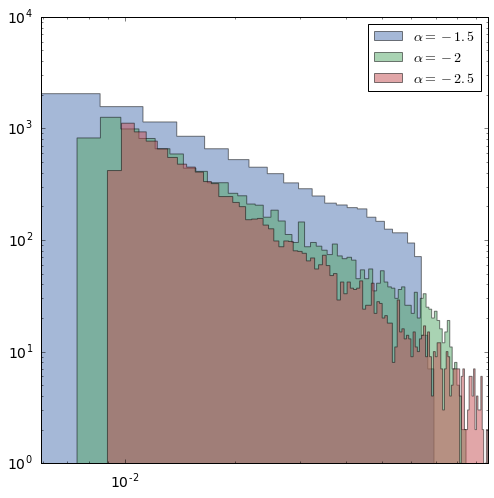

In [118]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
_,kbins = density_estimation.knuth_bin_width(events['alpha15'],return_bins=True)
ax.hist(events['alpha15'],bins=kbins,color=sns.color_palette('deep')[0],alpha=0.5,histtype='stepfilled',label=r'$\alpha=-1.5$')
_,kbins = density_estimation.knuth_bin_width(events['alpha20'],return_bins=True)
ax.hist(events['alpha20'],bins=kbins,color=sns.color_palette('deep')[1],alpha=0.5,histtype='stepfilled',label=r'$\alpha=-2$')
_,kbins = density_estimation.knuth_bin_width(events['alpha25'],return_bins=True)
ax.hist(events['alpha25'],bins=kbins,color=sns.color_palette('deep')[2],alpha=0.5,histtype='stepfilled',label=r'$\alpha=-2.5$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc='best')
ax.set_xlim([np.min([np.min(events['alpha15']),np.min(events['alpha25']),np.min(events['alpha20'])]),
            np.max([np.max(events['alpha15']),np.max(events['alpha25']),np.max(events['alpha20'])])])

## Figure 4

$\mathrm{EM}$ distribution showing many runs superimposed on top of the mean and standard deviation.

## Emission Measure Slope Histogram Testing

These will go somewhere in Figures 8 and 9

Build histograms showing hot ($b$) and cool ($a$) emission measure slopes grouped by heating distribution type ($\alpha,\beta$) and heating frequency ($t_N$). 

We need to set up the legend labels and colors for the plots.

### Group by $(\alpha,\beta)$

 First, set up the list of heating function types. Then configure the labels and colors.

In [56]:
alpha_list = [['uniform',''],['1.5','-b1.0'],['2.0','-b1.0'],['2.5','-b1.0']]

In [57]:
colors = [sns.color_palette('deep')[i] for i in range(len(alpha_list))]
styles = len(alpha_list)*['solid']
labels = [r'$\mathrm{uniform}$',r'$-1.5$, $\beta=1$',r'$-2.0$, $\beta=1$',r'$-2.5$, $\beta=1$']
histo_opts = {}
for i in range(len(alpha_list)):
    histo_opts[''.join(alpha_list[i])] = {'color':colors[i],'label':labels[i],'linestyle':styles[i],'linewidth':3,
                                         'normed':True,'stacked':True}

Now initialize the histogram builder class and build the histograms for the electron heating case.

In [58]:
hb_electron_alpha = ebpe.EMHistoBuilder('electron',40.0,200.0,alpha_list)

In [59]:
hb_electron_alpha.load_fits()

Optimization terminated successfully.
         Current function value: 0.491973
         Iterations: 13
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: -6118.381384
         Iterations: 18
         Function evaluations: 50
Optimization terminated successfully.
         Current function value: -7978.831729
         Iterations: 22
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -5100.298189
         Iterations: 21
         Function evaluations: 56


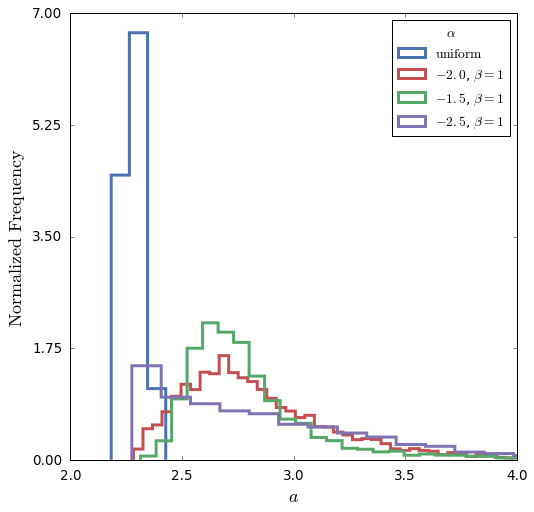

In [63]:
hb_electron_alpha.make_fit_histogram('cool',histo_opts=histo_opts,leg=True,x_limits=[2,4],bin_tool='knuth')

Optimization terminated successfully.
         Current function value: -10.315813
         Iterations: 14
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: -11170.307675
         Iterations: 25
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: -12345.283128
         Iterations: 24
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: -10235.663100
         Iterations: 24
         Function evaluations: 64


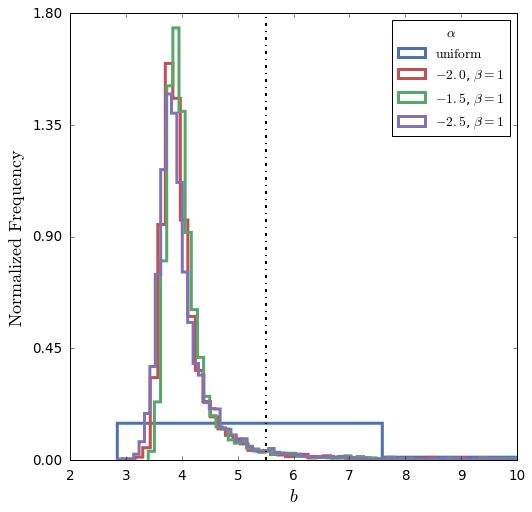

In [64]:
hb_electron_alpha.make_fit_histogram('hot',histo_opts=histo_opts,leg=True,x_limits=[2,10],bin_tool='knuth')

Now, check the results for ion heating and the single-fluid case.

In [65]:
hb_ion_alpha = ebpe.EMHistoBuilder('ion',40.0,200.0,alpha_list)

In [66]:
hb_ion_alpha.load_fits()

Optimization terminated successfully.
         Current function value: 1.201372
         Iterations: 13
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: -6615.046329
         Iterations: 23
         Function evaluations: 61
Optimization terminated successfully.
         Current function value: -8341.525933
         Iterations: 24
         Function evaluations: 61
Optimization terminated successfully.
         Current function value: -4649.035760
         Iterations: 16
         Function evaluations: 46


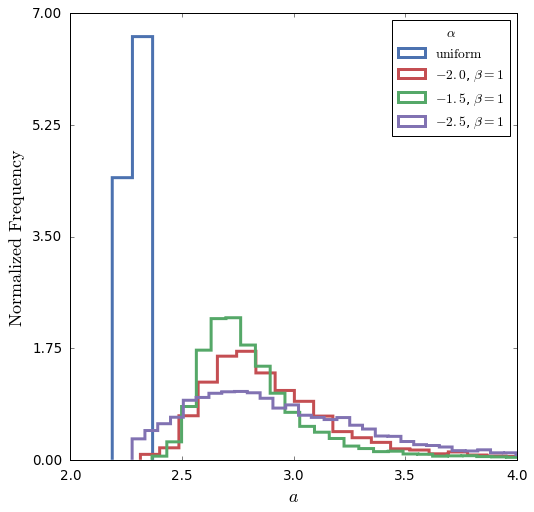

Optimization terminated successfully.
         Current function value: -2.324564
         Iterations: 12
         Function evaluations: 35
Optimization terminated successfully.
         Current function value: -7972.462259
         Iterations: 23
         Function evaluations: 58
Optimization terminated successfully.
         Current function value: -9364.889986
         Iterations: 19
         Function evaluations: 52
Optimization terminated successfully.
         Current function value: -6845.151934
         Iterations: 17
         Function evaluations: 48


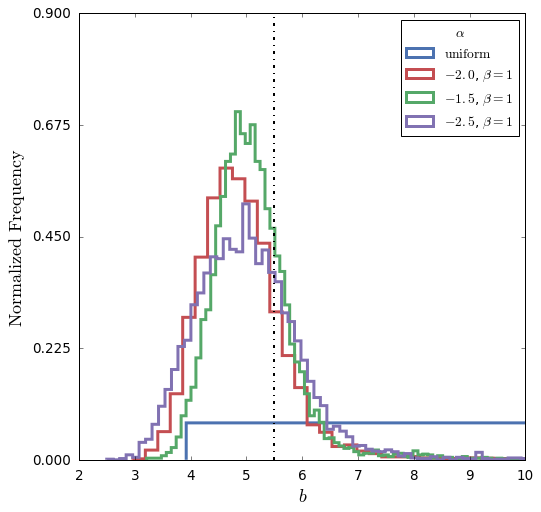

In [67]:
hb_ion_alpha.make_fit_histogram('cool',histo_opts=histo_opts,leg=True,x_limits=[2,4],bin_tool='knuth')
hb_ion_alpha.make_fit_histogram('hot',histo_opts=histo_opts,leg=True,x_limits=[2,10],bin_tool='knuth')

Optimization terminated successfully.
         Current function value: -5921.686380
         Iterations: 22
         Function evaluations: 59
Optimization terminated successfully.
         Current function value: -7568.240943
         Iterations: 18
         Function evaluations: 50
Optimization terminated successfully.
         Current function value: -4755.923364
         Iterations: 16
         Function evaluations: 44


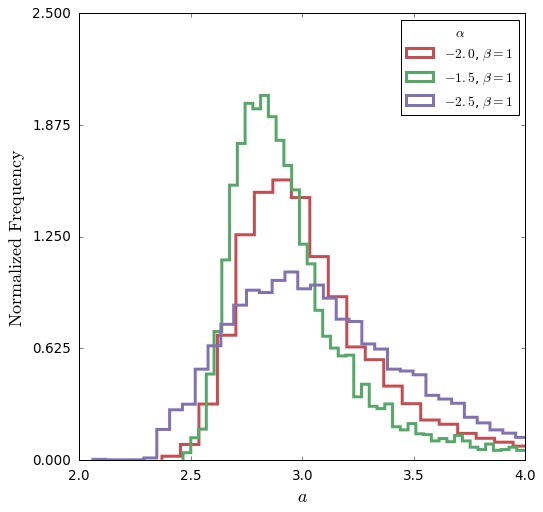

Optimization terminated successfully.
         Current function value: -8.287285
         Iterations: 14
         Function evaluations: 39
Optimization terminated successfully.
         Current function value: -10854.961743
         Iterations: 25
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: -11847.456074
         Iterations: 26
         Function evaluations: 68
Optimization terminated successfully.
         Current function value: -9758.162243
         Iterations: 20
         Function evaluations: 55


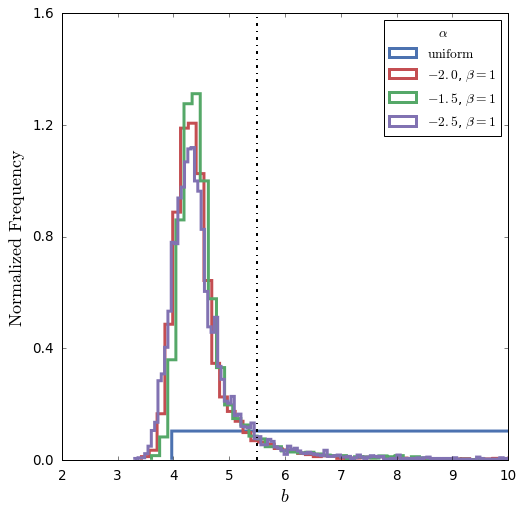

In [68]:
hb_single_alpha = ebpe.EMHistoBuilder('single',40.0,200.0,alpha_list)
hb_single_alpha.load_fits()
hb_single_alpha.make_fit_histogram('cool',histo_opts=histo_opts,leg=True,x_limits=[2,4],bin_tool='knuth')
hb_single_alpha.make_fit_histogram('hot',histo_opts=histo_opts,leg=True,x_limits=[2,10],bin_tool='knuth')

### Group by wait time, $t_N$

Now we'll group the different histograms by heating frequency. First, we need to reconfigure the histogram styling options.

In [69]:
t_wait = np.arange(250,5250,250)
styles = ['dotted','dashdot','dashed','solid']
interval = 3
colors = []
[colors.extend(len(styles)*[sns.color_palette('deep')[i]]) for i in range(int(len(t_wait)/len(styles)))] 
styles = int(len(t_wait)/len(styles))*styles
labels = [r'$%d$ s'%tw for tw in t_wait]
histo_opts = {}
for i in np.arange(0+interval,len(t_wait)+interval,1+interval):
    histo_opts[str(i)] = {'color':colors[i],'label':labels[i],'linestyle':styles[i],'linewidth':3,
                                         'normed':True,'stacked':True}

In [70]:
hb_electron_twait = ebpe.EMHistoBuilder('electron',40.0,200.0,alpha_list,group='by_t_wait')

In [71]:
hb_electron_twait.load_fits(t_wait_interval=interval)

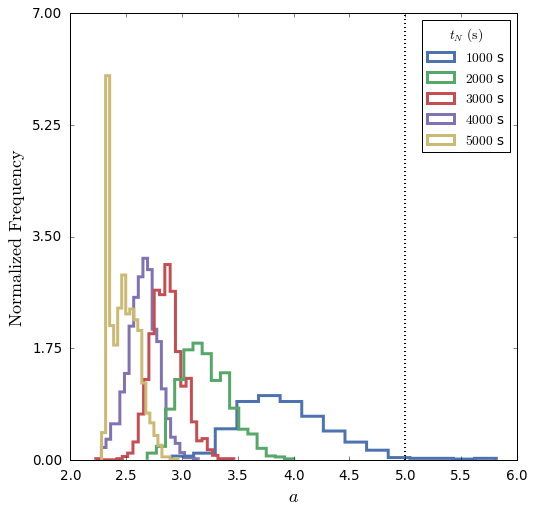

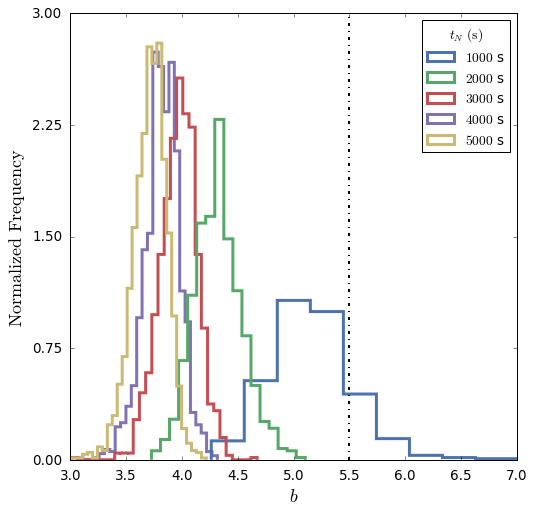

In [82]:
hb_electron_twait.make_fit_histogram('cool',histo_opts=histo_opts,leg=True,bin_tool='scotts')
hb_electron_twait.make_fit_histogram('hot',histo_opts=histo_opts,leg=True,x_limits=[3,7],bin_tool='scotts')

Next consider the ion heating case.

In [73]:
hb_ion_twait = ebpe.EMHistoBuilder('ion',40.0,200.0,alpha_list,group='by_t_wait')

In [74]:
hb_ion_twait.load_fits(t_wait_interval=interval)

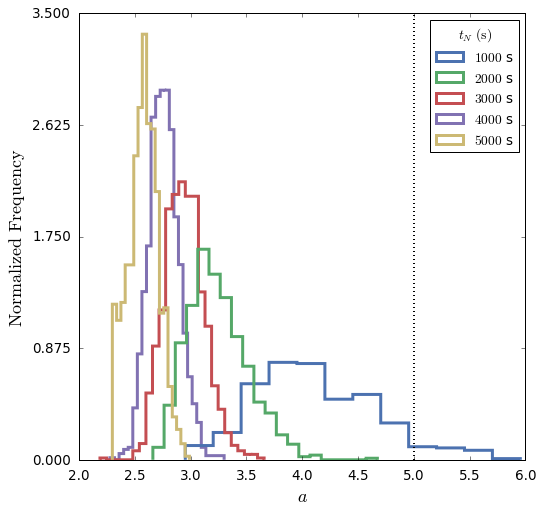

In [81]:
hb_ion_twait.make_fit_histogram('cool',histo_opts=histo_opts,leg=True,bin_tool='scotts')

And finally for the single-fluid case.

In [77]:
hb_single_twait = ebpe.EMHistoBuilder('single',40.0,200.0,alpha_list,group='by_t_wait')

In [78]:
hb_single_twait.load_fits(t_wait_interval=interval)

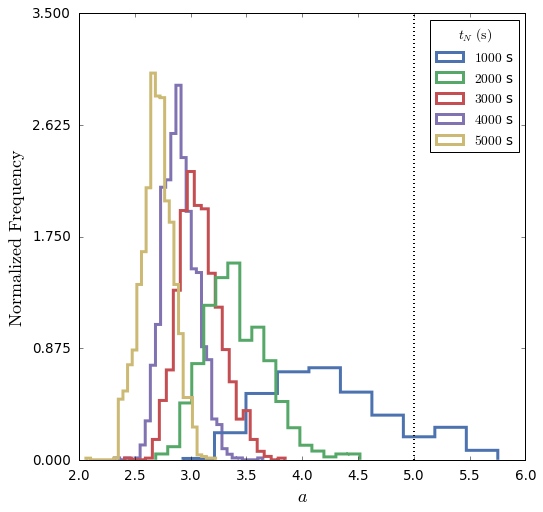

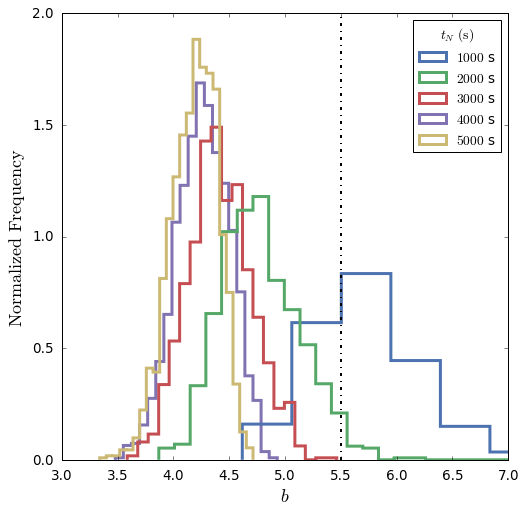

In [80]:
hb_single_twait.make_fit_histogram('cool',histo_opts=histo_opts,leg=True,bin_tool='scotts')
hb_single_twait.make_fit_histogram('hot',histo_opts=histo_opts,leg=True,x_limits=[3,7],bin_tool='scotts')